In [2]:
import tdt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pandas as pd

In [3]:
block = tdt.read_block(r'M:\2024 July,Aug GRABDA2m data (DLS C1906Y)\Progressive Ratio tanks\PR day 1 WT\EN145_PRD1-240819-144327')
block

read from t=0s to t=3599.21s


epocs	[struct]
snips	[struct]
streams	[struct]
scalars	[struct]
info	[struct]
time_ranges:	array([[ 0.],
       [inf]])

In [68]:
block.scalars.Fi1i

name:	'Fi1i'
code:	1764845894
size:	10
type:	513
type_str:	'scalars'
dform:	4
ts:	array([0.53182464])
data:	array([[  1.],
       [210.],
       [ 90.],
       [  5.],
       [  2.],
       [330.],
       [ 14.],
       [  5.]])

In [7]:
def print_keys(d, indent=0):
    if hasattr(d, 'items'):
        for k, v in d.items():
            print(" "*indent + f"{k}: {v}")
            print_keys(v, indent=indent+4)
    else:
        print(d)

print_keys(block)

epocs: Cam1	[struct]
P1SC	[struct]
UnNP	[struct]
RMG_	[struct]
URM_	[struct]
RNP_	[struct]
Nose	[struct]
Tick	[struct]
    Cam1: name:	'Cam1'
onset:	array([9.56825600e-02, 1.44015360e-01, 1.93658880e-01, ...,
       3.59901168e+03, 3.59906001e+03, 3.59911096e+03])
offset:	array([1.44015360e-01, 1.93658880e-01, 2.63454720e-01, ...,
       3.59906001e+03, 3.59911096e+03,            inf])
type:	'onset'
type_str:	'epocs'
data:	array([1.0000e+00, 2.0000e+00, 3.0000e+00, ..., 7.1962e+04, 7.1963e+04,
       7.1964e+04])
dform:	4
size:	10
        name: Cam1
Cam1
        onset: [9.56825600e-02 1.44015360e-01 1.93658880e-01 ... 3.59901168e+03
 3.59906001e+03 3.59911096e+03]
[9.56825600e-02 1.44015360e-01 1.93658880e-01 ... 3.59901168e+03
 3.59906001e+03 3.59911096e+03]
        offset: [1.44015360e-01 1.93658880e-01 2.63454720e-01 ... 3.59906001e+03
 3.59911096e+03            inf]
[1.44015360e-01 1.93658880e-01 2.63454720e-01 ... 3.59906001e+03
 3.59911096e+03            inf]
        type: onset


In [8]:
dopa = block.streams['_465A']
dopa

name:	'_465A'
code:	1094006324
size:	138
type:	33025
type_str:	'streams'
ucf:	False
fs:	1017.2526245117188
dform:	0
start_time:	0.0
data:	array([ 0.22428346,  0.22479099,  0.22547062, ..., 97.98742   ,
       97.99541   , 98.00356   ], dtype=float32)
channel:	[1]

In [9]:
isob = block.streams['_415A']
isob

name:	'_415A'
code:	1094005044
size:	138
type:	33025
type_str:	'streams'
ucf:	False
fs:	1017.2526245117188
dform:	0
start_time:	0.0
data:	array([  0.3289925 ,   0.33616173,   0.34352767, ..., 144.6027    ,
       144.61401   , 144.62556   ], dtype=float32)
channel:	[1]

In [15]:
time = np.linspace(1,len(dopa.data), len(dopa.data))/dopa.fs
time

array([9.83039980e-04, 1.96607996e-03, 2.94911994e-03, ...,
       3.59908828e+03, 3.59908926e+03, 3.59909025e+03])

In [40]:
rnp_times = block.epocs['RNP_'].onset
rnp_times

array([   4.63405056,   71.6283904 ,  164.57826304,  255.88678656,
        381.09249536,  692.55856128,  874.45618688, 1267.8258688 ,
       1501.32342784, 1687.11241728, 2008.4604928 , 2495.59990272,
       2756.96959488, 3184.25481216])

541 3661184 541.0000108199999


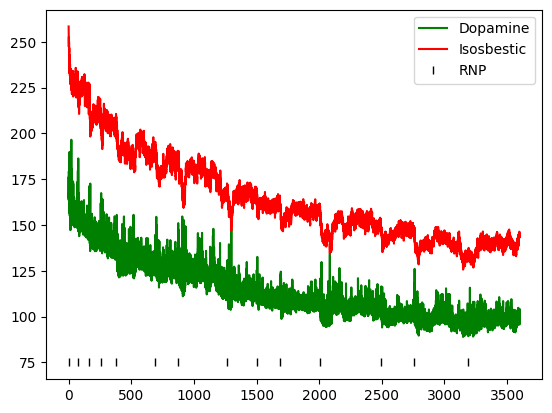

In [90]:
fig, ax = plt.subplots(1,1)
onset = int(block.scalars.Fi1i.ts[0] * dopa.fs)
offset = dopa.data.shape[0]
print(onset, offset, block.scalars.Fi1i.ts[0] * dopa.fs)

ax.plot(time[onset:offset], dopa.data[onset:offset], c='g', label='Dopamine')
ax.plot(time[onset:offset], isob.data[onset:offset], c='r', label='Isosbestic')


ax.plot(rnp_times, np.full(np.size(rnp_times), 75), label='RNP', color='w', marker="|", mec='k')

ax.legend()

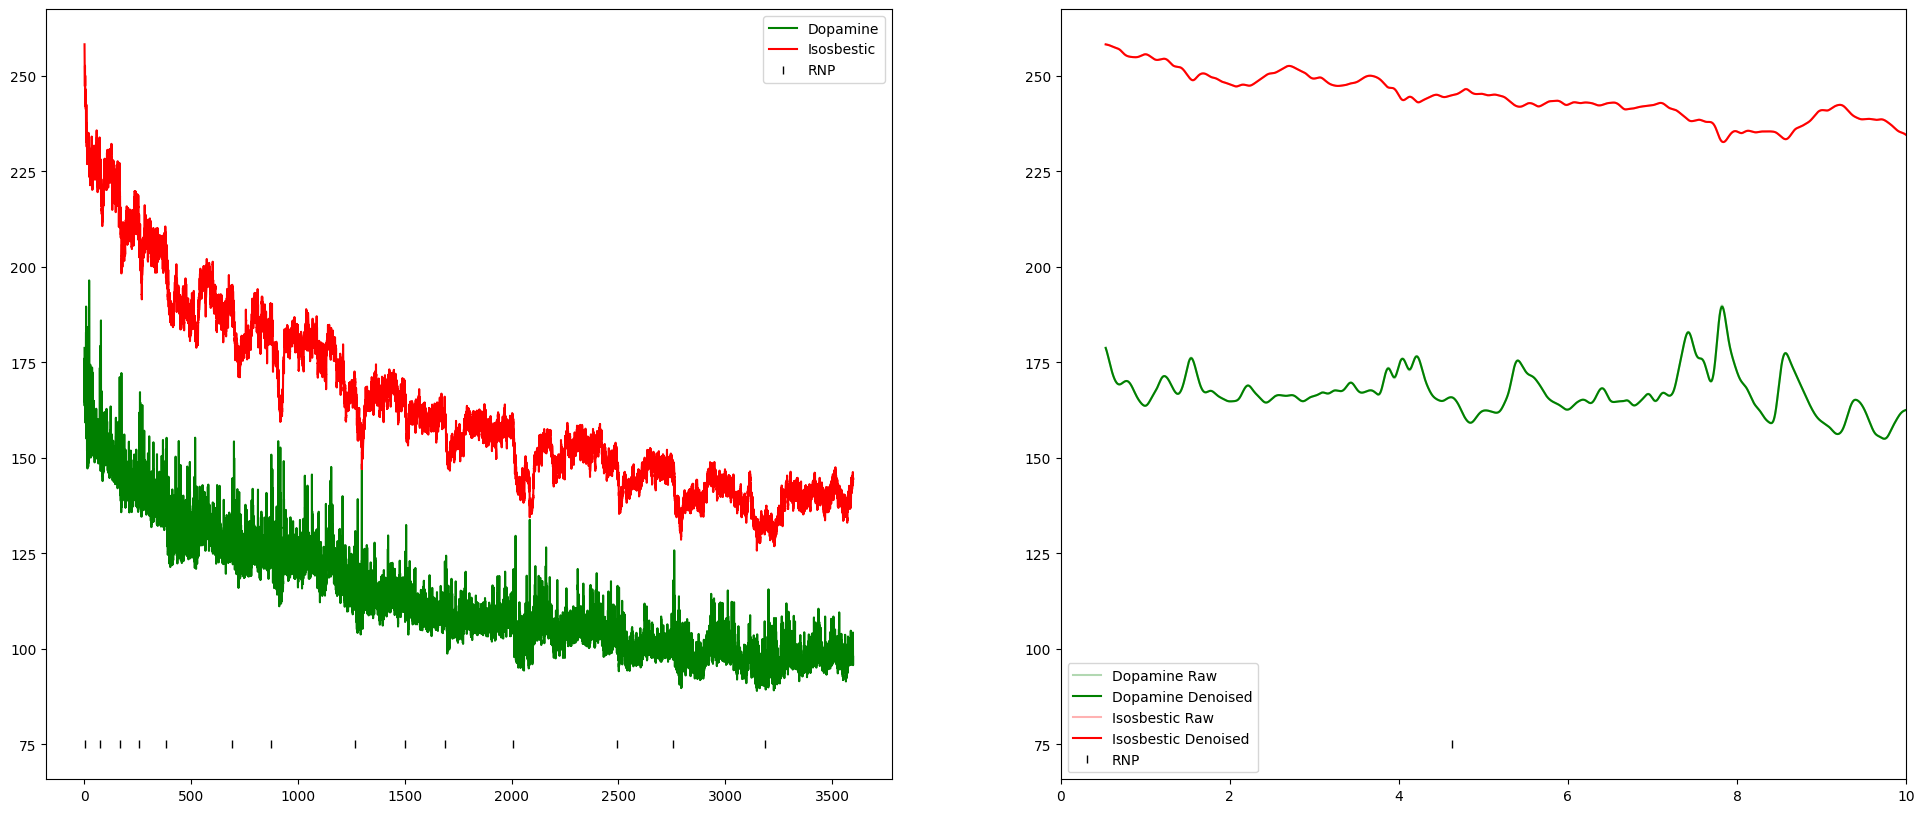

In [91]:
# Lowpass filter - zero phase filtering (with filtfilt) is used to avoid distorting the signal.
b,a = scipy.signal.butter(2, 10, btype='low', fs=dopa.fs)
dopa_denoised = scipy.signal.filtfilt(b, a, dopa.data)
isob_denoised = scipy.signal.filtfilt(b, a, isob.data)


fig, axs = plt.subplots(1,2, figsize=(24, 10))

axs[0].plot(time[onset:offset], dopa_denoised[onset:offset], c='g', label='Dopamine')
axs[0].plot(time[onset:offset], isob_denoised[onset:offset], c='r', label='Isosbestic')
axs[0].plot(rnp_times, np.full(np.size(rnp_times), 75), label='RNP', color='w', marker="|", mec='k')
axs[0].legend()


axs[1].plot(time[onset:offset], dopa.data[onset:offset], c='g', alpha=0.3, label='Dopamine Raw')
axs[1].plot(time[onset:offset], dopa_denoised[onset:offset], c='g', label='Dopamine Denoised')
axs[1].plot(time[onset:offset], isob.data[onset:offset], c='r', alpha=0.3, label='Isosbestic Raw')
axs[1].plot(time[onset:offset], isob_denoised[onset:offset], c='r', label='Isosbestic Denoised')
axs[1].plot(rnp_times, np.full(np.size(rnp_times), 75), label='RNP', color='w', marker="|", mec='k')
axs[1].set_xlim(0, 10)
axs[1].legend()

In [92]:
print(dopa.data[1000:1010])
print(dopa_denoised[1000:1010])

[163.7117  163.70001 163.68883 163.67816 163.66814 163.65884 163.65034
 163.6426  163.63562 163.62941]
[163.71506865 163.70514602 163.69586525 163.68723776 163.67927485
 163.67198772 163.66538738 163.65948465 163.65429015 163.64981424]


In [93]:
block.epocs['RNP_'].onset

array([   4.63405056,   71.6283904 ,  164.57826304,  255.88678656,
        381.09249536,  692.55856128,  874.45618688, 1267.8258688 ,
       1501.32342784, 1687.11241728, 2008.4604928 , 2495.59990272,
       2756.96959488, 3184.25481216])

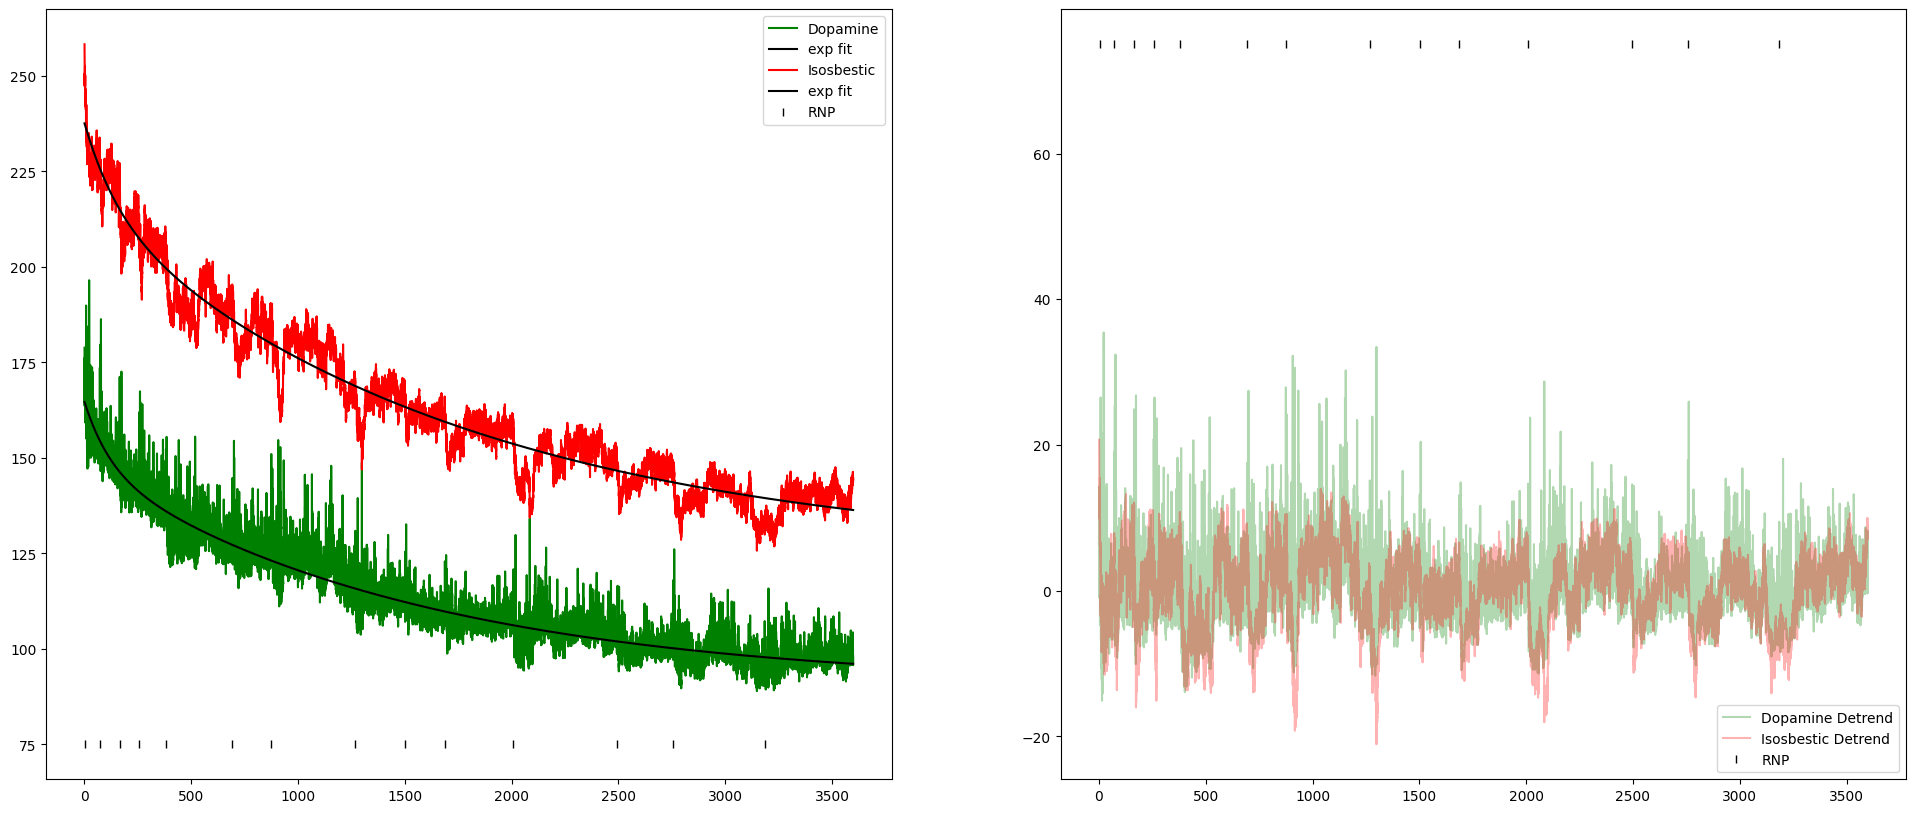

In [96]:
# The double exponential curve we are going to fit.
import scipy.optimize


def double_exponential(t, const, amp_fast, amp_slow, tau_slow, tau_multiplier):
    '''Compute a double exponential function with constant offset.
    Parameters:
    t       : Time vector in seconds.
    const   : Amplitude of the constant offset. 
    amp_fast: Amplitude of the fast component.  
    amp_slow: Amplitude of the slow component.  
    tau_slow: Time constant of slow component in seconds.
    tau_multiplier: Time constant of fast component relative to slow. 
    '''
    tau_fast = tau_slow*tau_multiplier
    return const+amp_slow*np.exp(-t/tau_slow)+amp_fast*np.exp(-t/tau_fast)

def fit_double_exponential(time, signal):
    max_sig = np.max(signal)
    inital_params = [max_sig/2, max_sig/4, max_sig/4, 3600, 0.1]
    bounds = ([0      , 0      , 0      , 600  , 0],
            [max_sig, max_sig, max_sig, 36000, 1])
    dLight_parms, parm_cov = scipy.optimize.curve_fit(double_exponential, time, signal,
                                    p0=inital_params, bounds=bounds, maxfev=1000)
    return double_exponential(time, *dLight_parms)


dopa_fit = fit_double_exponential(time[onset:offset], dopa.data[onset:offset])
isob_fit = fit_double_exponential(time[onset:offset], isob.data[onset:offset])

fig, axs = plt.subplots(1,2, figsize=(24, 10))


axs[0].plot(time[onset:offset], dopa.data[onset:offset], c='g', label='Dopamine')
axs[0].plot(time[onset:offset], dopa_fit, c='k', label='exp fit')
axs[0].plot(time[onset:offset], isob.data[onset:offset], c='r', label='Isosbestic')
axs[0].plot(time[onset:offset], isob_fit, c='k', label='exp fit')
axs[0].plot(rnp_times, np.full(np.size(rnp_times), 75), label='RNP', color='w', marker="|", mec='k')
axs[0].legend()


axs[1].plot(time[onset:offset], dopa.data[onset:offset] - dopa_fit, c='g', alpha=0.3, label='Dopamine Detrend')
axs[1].plot(time[onset:offset], isob.data[onset:offset] - isob_fit, c='r', alpha=0.3, label='Isosbestic Detrend')
axs[1].plot(rnp_times, np.full(np.size(rnp_times), 75), label='RNP', color='w', marker="|", mec='k')
#axs[1].set_xlim(0, 10)
axs[1].legend()

Slope    : 0.338
R-squared: 0.204


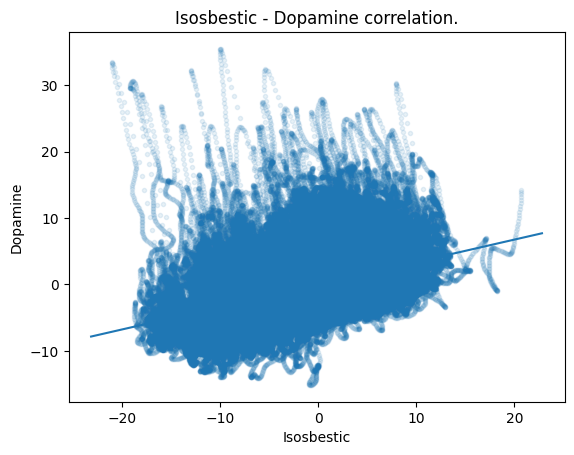

In [97]:
import scipy.stats


slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=isob.data[onset:offset] - isob_fit, y=dopa.data[onset:offset] - dopa_fit)

plt.scatter((isob.data[onset:offset] - isob_fit)[::5], (dopa.data[onset:offset] - dopa_fit)[::5],alpha=0.1, marker='.')
x = np.array(plt.xlim())
plt.plot(x, intercept+slope*x)
plt.xlabel('Isosbestic')
plt.ylabel('Dopamine')
plt.title('Isosbestic - Dopamine correlation.')

print('Slope    : {:.3f}'.format(slope))
print('R-squared: {:.3f}'.format(r_value**2))

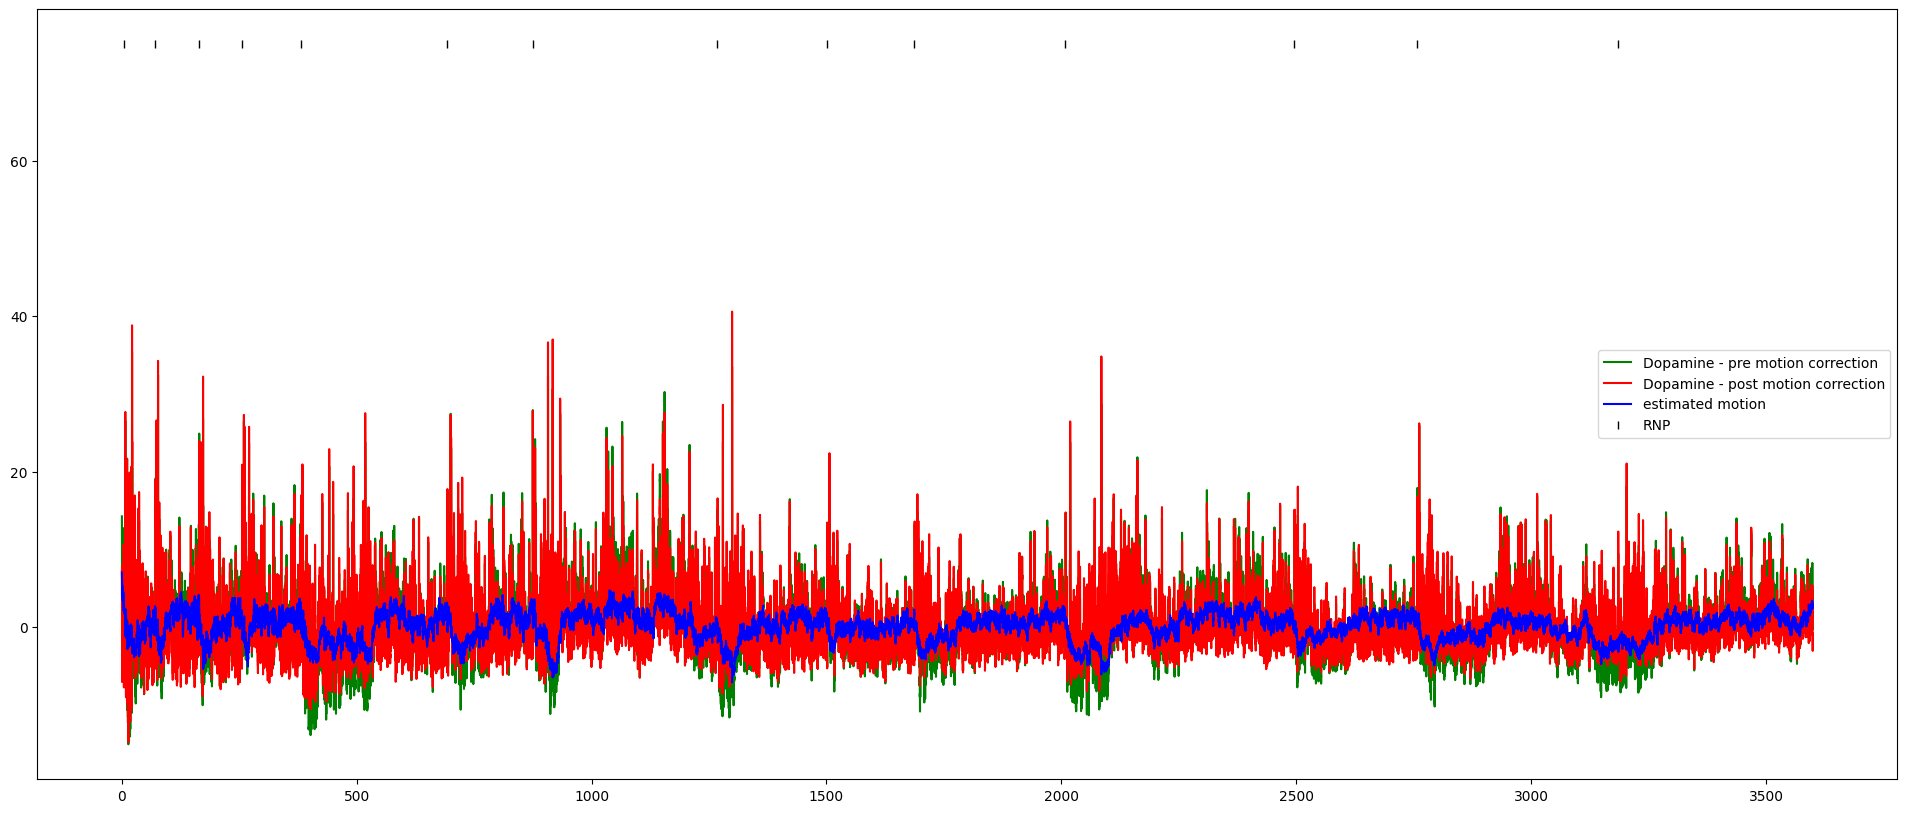

In [99]:
dopa_est_motion = intercept + slope * (isob.data[onset:offset] - isob_fit)
dopa_est_motion

fig, ax = plt.subplots(1,1, figsize=(24, 10))
ax.plot(time[onset:offset], dopa.data[onset:offset] - dopa_fit, c='g', label='Dopamine - pre motion correction')
ax.plot(time[onset:offset], dopa.data[onset:offset] - dopa_fit - dopa_est_motion, c='r', label='Dopamine - post motion correction')
ax.plot(time[onset:offset], dopa_est_motion, c='b', label='estimated motion')

ax.plot(rnp_times, np.full(np.size(rnp_times), 75), label='RNP', color='w', marker="|", mec='k')
ax.legend()

(array([[12.92523566, 12.86925192, 12.81483447, ..., -3.05033804,
         -3.08430126, -3.11836078],
        [-5.66488862, -5.65656884, -5.64797753, ...,  4.67181082,
          4.63043144,  4.58856027],
        [ 1.62494299,  1.60380252,  1.58228246, ..., -5.02635577,
         -5.04628283, -5.06627936],
        ...,
        [ 1.40633315,  1.39042067,  1.37467191, ...,  2.53255383,
          2.4987946 ,  2.46532344],
        [ 0.94900611,  0.93311654,  0.91697973, ...,  5.08728685,
          5.06947215,  5.0519649 ],
        [ 0.15147474,  0.14513934,  0.13900602, ...,  1.05609423,
          1.07534341,  1.09406925]]),
 array([-0.99901696, -0.99803392, -0.99705088, ...,  1.99827194,
         1.99925498,  2.00023802]))

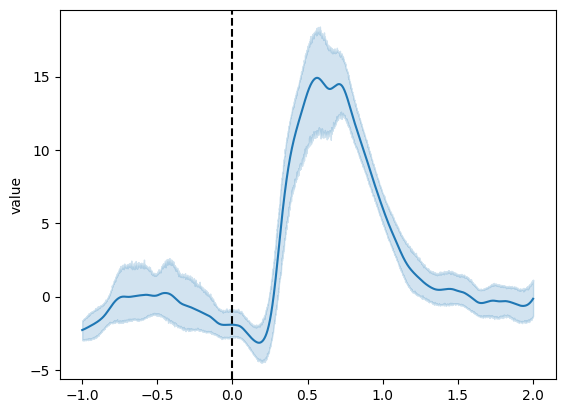

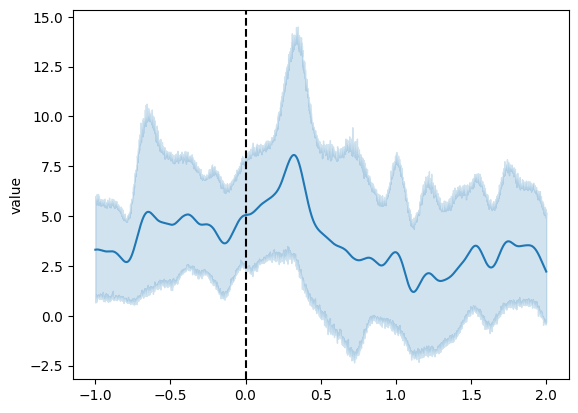

In [134]:
def lowpass_filter(signal, fs, Wn=10):
    b, a = scipy.signal.butter(2, Wn, btype='lowpass', fs=fs)
    return scipy.signal.filtfilt(b, a, signal)


def double_exponential(t, const, amp_fast, amp_slow, tau_slow, tau_multiplier):
    '''Compute a double exponential function with constant offset.
    Parameters:
    t       : Time vector in seconds.
    const   : Amplitude of the constant offset. 
    amp_fast: Amplitude of the fast component.  
    amp_slow: Amplitude of the slow component.  
    tau_slow: Time constant of slow component in seconds.
    tau_multiplier: Time constant of fast component relative to slow. 
    '''
    tau_fast = tau_slow * tau_multiplier
    return const + amp_slow * np.exp(-t / tau_slow) + amp_fast * np.exp(-t / tau_fast)

def fit_double_exponential(time, signal):
    max_sig = np.max(signal)
    inital_params = [max_sig/2, max_sig/4, max_sig/4, 3600, 0.1]
    bounds = ([0      , 0      , 0      , 600  , 0],
              [max_sig, max_sig, max_sig, 36000, 1])
    parm_opt, parm_cov = scipy.optimize.curve_fit(double_exponential,
                                                  time,
                                                  signal,
                                                  p0=inital_params,
                                                  bounds=bounds,
                                                  maxfev=1000)
    return double_exponential(time, *parm_opt)


def detrend_double_exponential(time, signal):
    signal_fit = fit_double_exponential(time, signal)
    return signal - signal_fit

def estimate_motion(signal, isosbestic):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=isosbestic, y=signal)
    est_motion = intercept + slope * (isosbestic)
    return signal - est_motion



def find_nearest(array, value):
    array = np.asarray(array)
    return (np.abs(array - value)).argmin()


def plot_signal_at_events(events, signal, time, ax=None, pre=1.0, post=2.0):
    if ax is None:
        fig, ax = plt.subplots()

    sampling_rate = 1 / np.median(np.diff(time))
    pre_idxs = int(np.rint(pre * sampling_rate))
    post_idxs = int(np.rint(post * sampling_rate))
    n_samples = pre_idxs + post_idxs
    new_time = (np.linspace(1, n_samples, n_samples) / sampling_rate) - pre

    accum = np.empty_like(signal, shape=(events.shape[0], n_samples))
    for ei, event in enumerate(events):
        event_idx = find_nearest(time, event)
        start = event_idx - pre_idxs
        stop = event_idx + post_idxs
        accum[ei, :] = signal[start:stop]

    df = pd.DataFrame(accum.T)
    df.index = new_time
    df = df.melt(ignore_index=False)

    sns.lineplot(data=df, x=df.index, y='value', ax=ax)
    ax.axvline(0, c='k', ls='--')

    return accum, new_time




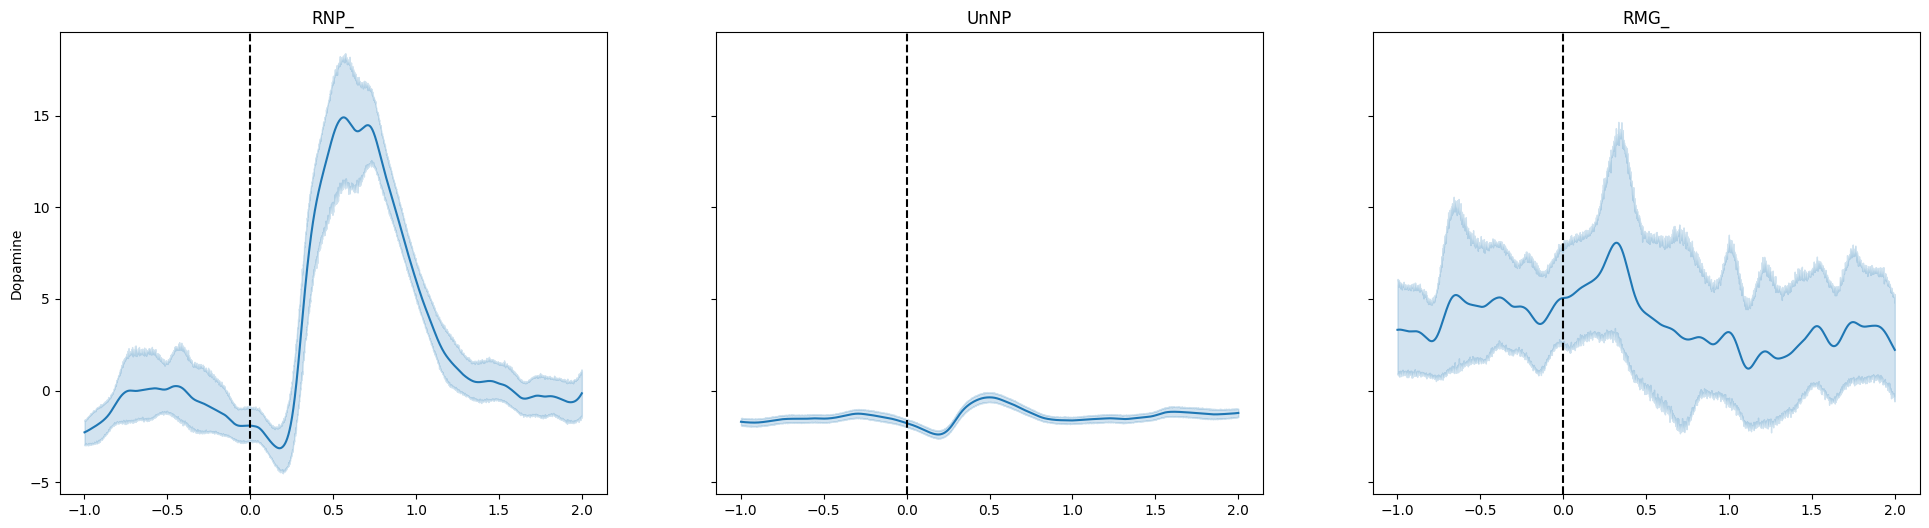

In [135]:
fig, axs = plt.subplots(1, 3, figsize=(24, 6), sharey=True, sharex=True)

for i, e in enumerate(['RNP_', 'UnNP', 'RMG_']):
    ax = axs[i]
    plot_signal_at_events(block.epocs[e].onset, dopa.data[onset:offset] - dopa_fit - dopa_est_motion, time[onset:offset], ax=ax)
    ax.set_ylabel('Dopamine')
    ax.set_title(e)





In [4]:
block.streams


_415A	[struct]
_465A	[struct]
Fi1d	[struct]
Fi1r	[struct]

In [5]:
block.streams.items()

dict_items([('_415A', name:	'_415A'
code:	np.uint32(1094005044)
size:	np.uint32(138)
type:	np.uint32(33025)
type_str:	'streams'
ucf:	np.False_
fs:	np.float64(1017.2526245117188)
dform:	np.uint32(0)
start_time:	np.float64(0.0)
data:	array([  0.3289925 ,   0.33616173,   0.34352767, ..., 144.6027    ,
       144.61401   , 144.62556   ], dtype=float32)
channel:	[1]), ('_465A', name:	'_465A'
code:	np.uint32(1094006324)
size:	np.uint32(138)
type:	np.uint32(33025)
type_str:	'streams'
ucf:	np.False_
fs:	np.float64(1017.2526245117188)
dform:	np.uint32(0)
start_time:	np.float64(0.0)
data:	array([ 0.22428346,  0.22479099,  0.22547062, ..., 97.98742   ,
       97.99541   , 98.00356   ], dtype=float32)
channel:	[1]), ('Fi1d', name:	'Fi1d'
code:	np.uint32(1680959814)
size:	np.uint32(522)
type:	np.uint32(33025)
type_str:	'streams'
ucf:	np.False_
fs:	np.float64(6103.515625)
dform:	np.uint32(0)
start_time:	np.float64(0.0)
data:	array([[0.        , 1.4388273 , 1.2600646 , ..., 1.6759124 , 1.5327101 ,
  